In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [2]:
transactions=[['Bread','Milk'],['Bread','Diaper','Beer','Eggs'],\
              ['Milk',"Diaper","Beer","Coke"],['Bread','Milk','Diaper','Beer'],\
             ['Bread','Milk','Diaper','Coke']]

In [3]:
transactions

[['Bread', 'Milk'],
 ['Bread', 'Diaper', 'Beer', 'Eggs'],
 ['Milk', 'Diaper', 'Beer', 'Coke'],
 ['Bread', 'Milk', 'Diaper', 'Beer'],
 ['Bread', 'Milk', 'Diaper', 'Coke']]

In [4]:
items=[]
for transaction in transactions:
    items+=transaction
items=set(items)
items

{'Beer', 'Bread', 'Coke', 'Diaper', 'Eggs', 'Milk'}

In [5]:
association_rules = list(apriori(transactions))

In [6]:
association_rules[0]

RelationRecord(items=frozenset({'Beer'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Beer'}), confidence=0.6, lift=1.0)])

In [7]:
len(association_rules)

35

In [8]:
2**len(items)

64

In [9]:
2**len(items)-len(association_rules)
# with support 0

29

In [10]:
def clean(input_list):
    input_list=list(input_list)
    input_list.sort()
    input_list=str(input_list).replace("[",'').replace("]",'').replace(" ",'').replace("'",'')
    return input_list

In [11]:
clean(["a","e","d"])

'a,d,e'

In [12]:
results=pd.DataFrame(columns=["itemset","support","X","Y","confidence","lift"])
for rule in association_rules:
    itemset=clean(rule.items)
    support=rule.support
    for comb in rule.ordered_statistics:
        X=clean(comb.items_base)
        Y=clean(comb.items_add)
        confidence=comb.confidence
        lift=comb.lift
        results=results.append({"itemset":itemset,"support":support,"X":X,"Y":Y,
                        "confidence":confidence,"lift":lift},ignore_index=True)

In [13]:
results[:10]
# lift=P(Y|X)/P(Y)

,itemset,support,X,Y,confidence,lift
0,Beer,0.6,,Beer,0.600000,1.000000
1,Bread,0.8,,Bread,0.800000,1.000000
2,Coke,0.4,,Coke,0.400000,1.000000
3,Diaper,0.8,,Diaper,0.800000,1.000000
4,Eggs,0.2,,Eggs,0.200000,1.000000
5,Milk,0.8,,Milk,0.800000,1.000000
6,"Beer,Bread",0.4,Beer,Bread,0.666667,0.833333
7,"Beer,Bread",0.4,Bread,Beer,0.500000,0.833333
8,"Beer,Coke",0.2,Beer,Coke,0.333333,0.833333
9,"Beer,Coke",0.2,Coke,Beer,0.500000,0.833333


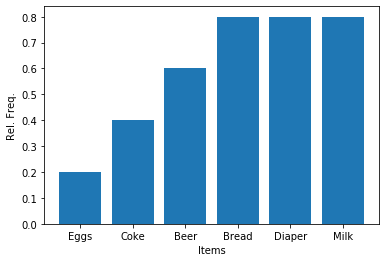

In [14]:
plt.bar(results[:6].sort_values('support')['itemset'],results[:6].sort_values('support')['support'])
plt.xlabel("Items")
plt.ylabel("Rel. Freq.")
plt.show()

In [15]:
results.query("itemset=='Beer'").support.values[0]

0.6

In [16]:
results.query("itemset=='Beer,Diaper'").support.values[0]

0.6

In [17]:
results.query("itemset=='Beer,Diaper,Eggs'").support.values[0]

0.2

In [18]:
results.query("X=='Coke,Diaper,Milk' and Y=='Beer'")[['X','Y','confidence','lift']]

,X,Y,confidence,lift
79,"Coke,Diaper,Milk",Beer,0.5,0.833333


In [19]:
import matplotlib.pyplot as plt

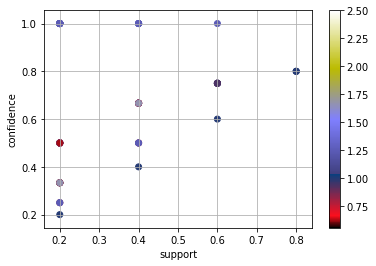

In [20]:
plt.scatter(results.support,results.confidence,c=results.lift,cmap="gist_stern")
plt.xlabel("support")
plt.ylabel("confidence")
plt.colorbar()
plt.grid()
plt.show()

In [21]:
results.query("support>0.5 and confidence>0.7 and lift>1")

,itemset,support,X,Y,confidence,lift
10,"Beer,Diaper",0.6,Beer,Diaper,1.00,1.25
11,"Beer,Diaper",0.6,Diaper,Beer,0.75,1.25


In [22]:
results.query("lift>2")[:1]
# lift=P(Y|X)/P(Y)

,itemset,support,X,Y,confidence,lift
35,"Beer,Bread,Eggs",0.2,"Beer,Bread",Eggs,0.5,2.5


In [23]:
P_y=results.query('itemset=="Eggs"')['support'].values[0]
P_y

0.2

In [24]:
#P_y_cond_x=p(x and y)/p(x)

In [25]:
P_x_y=results.query('itemset=="Beer,Bread,Eggs"')['support'].values[0]
P_x=results.query('itemset=="Beer,Bread"')['support'].values[0]
P_y_cond_x=P_x_y/P_x

In [26]:
P_y_cond_x

0.5

In [27]:
P_y_cond_x/P_y

2.5